In [1]:
from random import choices, randint
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def mock(start: datetime, end: datetime):

    df = pd.DataFrame()

    # base values
    temperature = 20 # slightly cold
    humidity = 40    # 40% ~ regular
    rainpower = 4095 # no rain
    is_raining = rain_stopped = False

    # increments
    t_inc = h_inc = r_inc = 0

    # weights
    def tw():
        if temperature > 24: return [40, 50, 10]
        elif temperature < 15: return [10, 50, 40]
        elif is_raining: return [40, 55, 5]
        else: return [25, 50, 25]

    def hw():
        if humidity > 60: return [40, 50, 10]
        elif humidity < 20: return [10, 50, 40]
        elif is_raining: [5, 45, 50]
        else: return [25, 50, 25]

    def rw():
        if (not is_raining) and (rainpower < 4095): return [0, 20, 80]
        elif is_raining:
            if rainpower > 1024: return [60, 40, 0]
            else: return [20, 70, 10]
        elif rainpower < 4095: return [0, 30, 70]
        else: return [0, 100, 0]

    # rain chance
    def rc():
        if humidity > 40: return [60, 40]
        elif humidity > 50: return [40, 60]
        elif humidity < 30: return [90, 10]
        else: return [80, 20]

    def rsc():
        if rainpower < 1024: return [30, 70]
        elif rainpower < 2048: return [50, 50]
        else: return [80, 20]

    # every five minutes a new entry is generated
    while start <= end:
        t_inc = choices([-1, 0, 1], tw())[0]
        h_inc = choices([-1, 0, 1], hw())[0]
        r_inc = choices([-100, 0, 100], rw())[0]

        temperature += t_inc
        humidity += h_inc
        rainpower += r_inc
        rainpower = rainpower if rainpower <= 4095 else 4095

        if not is_raining:
            is_raining = bool(choices([0, 1], rc()))
        else:
            rain_stopped = bool(choices([0, 1], rsc()))
            is_raining = not rain_stopped

        df = df.append({'date': start, 'temperature': temperature, 'humidity': humidity, 'rainpower': rainpower}, ignore_index=True)

        start += timedelta(seconds=(5 * 60))

    return df

In [18]:
df = mock(datetime(2022, 5, 22, 00, 00), datetime(2022, 5, 22, 23, 59))

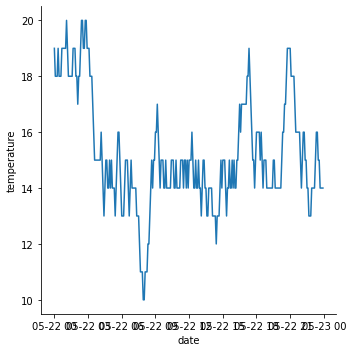

In [19]:
sns.relplot(data=df, kind="line", x="date", y="temperature")

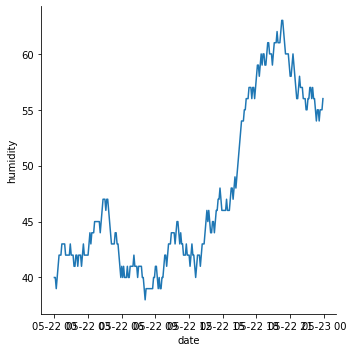

In [20]:
sns.relplot(data=df, kind="line", x="date", y="humidity")

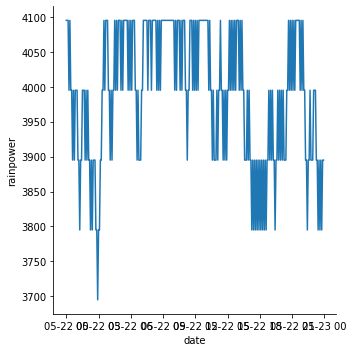

In [21]:
sns.relplot(data=df, kind="line", x="date", y="rainpower")

In [34]:

for i in df.to_dict('records'):
    sql = (
        f"""
        INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 1, {i['temperature']}, '{str(i['date']).replace('-', '')}')
        INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 2, {i['humidity']}, '{str(i['date']).replace('-', '')}')
        INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 3, {i['rainpower']}, '{str(i['date']).replace('-', '')}')"""
    )
    print(sql.replace('        ', '    '))


    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 1, 19.0, '20220522 00:00:00')
    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 2, 40.0, '20220522 00:00:00')
    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 3, 4095.0, '20220522 00:00:00')

    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 1, 18.0, '20220522 00:05:00')
    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 2, 40.0, '20220522 00:05:00')
    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 3, 4095.0, '20220522 00:05:00')

    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 1, 18.0, '20220522 00:10:00')
    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 2, 39.0, '20220522 00:10:00')
    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 3, 4095.0, '20220522 00:10:00')

    INSERT INTO [dbo].[EnvironmentInteraction] VALUES(@sensorCount, 1, 18.0, '20220522 00:15:00')
    INSERT